In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
train = pd.read_csv('input/train.csv')
client = pd.read_csv('input/client.csv')
electricity_prices = pd.read_csv('input/electricity_prices.csv')
forecast_weather = pd.read_csv('input/forecast_weather.csv')
gas_prices = pd.read_csv('input/gas_prices.csv')
historical_weather = pd.read_csv('input/historical_weather.csv')
train = train.dropna()

In [28]:
train['datetime'] = pd.to_datetime(train.datetime)
earliest = train['datetime'].min()
train['day_no'] = (train['datetime'] - earliest).dt.days
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['weekday'] = train['datetime'].apply(lambda x: x.dayofweek)
train.head(3)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,day_no,hour,month,weekday
0,0,0,1,0.713,0,2021-09-01,0,0,0,0,0,9,2
1,0,0,1,96.590,1,2021-09-01,0,1,0,0,0,9,2
2,0,0,2,0.000,0,2021-09-01,0,2,1,0,0,9,2


In [29]:
train2 = train.copy()
train2['product_type'] = (train2['product_type'] + 1) % 4
X = train2[['is_business', 'is_consumption', 'product_type', 'day_no', 'hour', 'month', 'weekday']]
y = train2['target']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=200000, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=200000, random_state=0)

In [31]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict_train = linreg.predict(X_train)
y_predict_valid = linreg.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
361.855556550744
MAE: validation set
359.9827299547037


In [32]:
county_map = {
    (24.7, 59.4): 0,
    (22.7, 58.8): 1,
    (27.2, 59.4): 2,
    (25.7, 58.8): 3,
    (26.2, 58.8): 4,
    (26.2, 59.4): 5,
    (23.7, 58.8): 6,
    (24.2, 58.5): 7,
    (27.2, 58.2): 8,
    (24.7, 58.8): 9,
    (22.7, 58.5): 10,
    (26.7, 58.5): 11,
    (24.7, 59.1): 12,
    (26.2, 57.9): 13,
    (25.2, 58.5): 14,
    (27.2, 57.9): 15
}
def get_county_id(row):
    lat, lon = row['latitude'], row['longitude']
    if int(row.name) % 1000000 == 0:
        print(row.name, '/', len(forecast_weather))
    if (lon, lat) in county_map:
        row['county_id'] = county_map[(lon, lat)]
    return row
forecast_weather2 = forecast_weather.apply(get_county_id, axis=1)
forecast_weather2.isnull().sum()

0 / 3424512
1000000 / 3424512
2000000 / 3424512
3000000 / 3424512


10_metre_u_wind_component                  0
10_metre_v_wind_component                  0
cloudcover_high                            0
cloudcover_low                             0
cloudcover_mid                             0
cloudcover_total                           0
county_id                            2935296
data_block_id                              0
dewpoint                                   0
direct_solar_radiation                     0
forecast_datetime                          0
hours_ahead                                0
latitude                                   0
longitude                                  0
origin_datetime                            0
snowfall                                   0
surface_solar_radiation_downwards          2
temperature                                0
total_precipitation                        0
dtype: int64

In [34]:
# forecast_weather3 = forecast_weather2.dropna()
# forecast_weather3.to_csv('output/forecast_weather_county_id.csv')
# forecast_weather3.head(3)
forecast_weather3 = pd.read_csv('output/forecast_weather_county_id.csv')
forecast_weather3.head()

,Unnamed: 0,10_metre_u_wind_component,10_metre_v_wind_component,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,county_id,data_block_id,dewpoint,direct_solar_radiation,forecast_datetime,hours_ahead,latitude,longitude,origin_datetime,snowfall,surface_solar_radiation_downwards,temperature,total_precipitation
0,23,1.523974,-2.439878,0.248322,0.104279,0.066223,0.332809,13.0,1,9.031396,0.0,2021-09-01 01:00:00+00:00,1,57.9,26.2,2021-09-01 00:00:00+00:00,0.0,0.0,10.058984,0.0
1,25,1.588183,-2.117612,0.057373,0.080933,0.004593,0.133881,15.0,1,9.018335,0.0,2021-09-01 01:00:00+00:00,1,57.9,27.2,2021-09-01 00:00:00+00:00,0.0,0.0,10.050806,0.0
2,39,2.072436,-1.438657,0.000000,0.076691,0.133987,0.143875,8.0,1,8.484277,0.0,2021-09-01 01:00:00+00:00,1,58.2,27.2,2021-09-01 00:00:00+00:00,0.0,0.0,9.637109,0.0
3,44,1.645679,-4.721860,0.462769,0.030365,0.000000,0.479096,10.0,1,10.484766,0.0,2021-09-01 01:00:00+00:00,1,58.5,22.7,2021-09-01 00:00:00+00:00,0.0,0.0,12.734277,0.0
4,47,1.527026,-3.641782,0.001282,0.425385,0.000290,0.426010,7.0,1,9.743921,0.0,2021-09-01 01:00:00+00:00,1,58.5,24.2,2021-09-01 00:00:00+00:00,0.0,0.0,12.436060,0.0


In [95]:
earliest = train['datetime'].min()
forecast_weather3['origin_datetime'] = pd.to_datetime(forecast_weather3['origin_datetime'], utc=True)
forecast_weather3['day_no'] = (forecast_weather3['origin_datetime'] - earliest.tz_localize('UTC')).dt.days

In [96]:
weather_cols = ['10_metre_u_wind_component', '10_metre_v_wind_component', 
                'cloudcover_high', 'cloudcover_low',
                'cloudcover_mid', 'cloudcover_total', 'dewpoint', 
                'direct_solar_radiation', 'snowfall', 'surface_solar_radiation_downwards',
                'temperature', 'total_precipitation']
train3 = train2.copy()
forecast_weather4 = forecast_weather3[forecast_weather3['hours_ahead'] == 1]

train4 = pd.merge(train3, forecast_weather4, how='left', left_on=['county','day_no'], right_on = ['county_id','day_no'])
train4 = train4.dropna()
train4.shape

(2014896, 33)

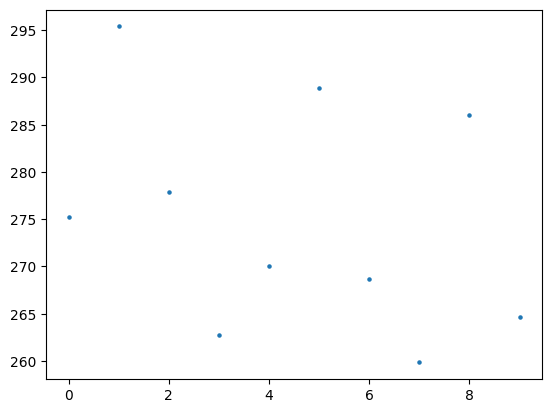

In [97]:
col = 'wind'
train5 = train4.copy()
train5['wind'] = np.sqrt(train5['10_metre_v_wind_component'] ** 2 + train5['10_metre_u_wind_component'] ** 2)
train5[col] = pd.qcut(train5[col], 10, labels=False, duplicates='drop')
g = train5.groupby(col)['target'].agg('mean')
plt.scatter(g.index, g, s=5);

In [98]:
X = train5[['is_business', 'is_consumption', 'product_type', 'day_no', 'hour', 'month', 'weekday',
            'cloudcover_high', 'cloudcover_low',
                'cloudcover_mid', 'cloudcover_total', 'dewpoint', 
                'direct_solar_radiation', 'snowfall', 'surface_solar_radiation_downwards',
                'temperature', 'total_precipitation', 'wind']]
y = train5['target']

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=200000, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=200000, random_state=0)

In [99]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict_train = linreg.predict(X_train)
y_predict_valid = linreg.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
361.5394246779996
MAE: validation set
362.55282603719627


In [127]:
gas_prices2 = gas_prices.copy()
earliest = train['datetime'].min()
gas_prices2['forecast_date'] = pd.to_datetime(gas_prices2['forecast_date'], utc=True)
gas_prices2['gp_day_no'] = (gas_prices2['forecast_date'] - earliest.tz_localize('UTC')).dt.days

electricity_prices2 = electricity_prices.copy()
electricity_prices2['forecast_date'] = pd.to_datetime(electricity_prices2['forecast_date'], utc=True)
electricity_prices2['ep_day_no'] = (electricity_prices2['forecast_date'] - earliest.tz_localize('UTC')).dt.days
electricity_prices2['ep_hour'] = electricity_prices2['forecast_date'].apply(lambda x: x.hour)
gas_prices2.head(2)

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id,gp_day_no
0,2021-09-01 00:00:00+00:00,45.23,46.32,2021-08-31,1,0
1,2021-09-02 00:00:00+00:00,45.62,46.29,2021-09-01,2,1


In [137]:
train6 = pd.merge(train3, gas_prices2, how='left', left_on=['day_no'], right_on=['gp_day_no'])
train6 = pd.merge(train6, electricity_prices2, how='left', left_on=['day_no', 'hour'], right_on=['ep_day_no', 'ep_hour'])
train6.shape

(2017824, 25)

In [160]:
# bins: highest_price_per_mwh, 15, lowest_price_per_mwh: 10, euros_per_mwh: 10

train7 = train6.dropna()
train7['highest_price_per_mwh'] = pd.qcut(train7['highest_price_per_mwh'], 15, labels=False, duplicates='drop')
train7['lowest_price_per_mwh'] = pd.qcut(train7['lowest_price_per_mwh'], 10, labels=False, duplicates='drop')
train7['euros_per_mwh'] = pd.qcut(train7['euros_per_mwh'], 10, labels=False, duplicates='drop')
# g = train7.groupby(col)['target'].agg('mean')
# plt.scatter(g.index, g, s=10);

/var/folders/_6/mpgcpwh91fj0m40mz9gtqmp80000gn/T/ipykernel_93206/3374148264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train7['highest_price_per_mwh'] = pd.qcut(train7['highest_price_per_mwh'], 15, labels=False, duplicates='drop')
/var/folders/_6/mpgcpwh91fj0m40mz9gtqmp80000gn/T/ipykernel_93206/3374148264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train7['lowest_price_per_mwh'] = pd.qcut(train7['lowest_price_per_mwh'], 10, labels=False, duplicates='drop')
/var/folders/_6/mpgcpwh91fj0m40mz9

In [161]:
X = train7[['is_business', 'is_consumption', 'product_type', 'day_no', 'hour', 'month', 'weekday',
            'euros_per_mwh', 'highest_price_per_mwh', 'lowest_price_per_mwh']]
y = train7['target']

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=200000, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=200000, random_state=0)

In [162]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict_train = linreg.predict(X_train)
y_predict_valid = linreg.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
361.0264412249774
MAE: validation set
365.83879317663303


In [165]:
historical_weather2 = historical_weather.apply(get_county_id, axis=1)
historical_weather2.isnull().sum()

0 / 3424512
1000000 / 3424512


cloudcover_high                 0
cloudcover_low                  0
cloudcover_mid                  0
cloudcover_total                0
county_id                 1466400
data_block_id                   0
datetime                        0
dewpoint                        0
diffuse_radiation               0
direct_solar_radiation          0
latitude                        0
longitude                       0
rain                            0
shortwave_radiation             0
snowfall                        0
surface_pressure                0
temperature                     0
winddirection_10m               0
windspeed_10m                   0
dtype: int64

In [206]:
historical_weather3 = historical_weather2.dropna()
historical_weather3.to_csv('output/historical_weather_county_id.csv')
historical_weather3.head(2)

,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,county_id,data_block_id,datetime,dewpoint,diffuse_radiation,direct_solar_radiation,latitude,longitude,rain,shortwave_radiation,snowfall,surface_pressure,temperature,winddirection_10m,windspeed_10m
23,86,16,0,40,13.0,1,2021-09-01 00:00:00,11.1,0.0,0.0,57.9,26.2,0.0,0.0,0.0,1005.6,13.6,354,3.722222
25,96,81,7,100,15.0,1,2021-09-01 00:00:00,12.0,0.0,0.0,57.9,27.2,0.0,0.0,0.0,999.6,13.6,360,3.611111


In [209]:
earliest = train['datetime'].min()
historical_weather3['datetime'] = pd.to_datetime(historical_weather3['datetime'], utc=True)
historical_weather3['day_no'] = (historical_weather3['datetime'] - earliest.tz_localize('UTC')).dt.days
historical_weather3['hour'] = historical_weather3['datetime'].apply(lambda x: x.hour)
train8 = pd.merge(train3, historical_weather3, how='left', left_on=['county','day_no', 'hour'], right_on = ['county_id','day_no', 'hour'])

/var/folders/_6/mpgcpwh91fj0m40mz9gtqmp80000gn/T/ipykernel_93206/3185267968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_weather3['datetime'] = pd.to_datetime(historical_weather3['datetime'], utc=True)
/var/folders/_6/mpgcpwh91fj0m40mz9gtqmp80000gn/T/ipykernel_93206/3185267968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_weather3['day_no'] = (historical_weather3['datetime'] - earliest.tz_localize('UTC')).dt.days
/var/folders/_6/mpgcpwh91fj0m40mz9gtqmp80000gn/T/ipykernel_9

In [219]:
train9 = train8.dropna()
X = train9[['is_business', 'is_consumption', 'product_type', 'day_no', 'hour', 'month', 'weekday',
            'cloudcover_high', 'cloudcover_low',
                'cloudcover_mid', 'cloudcover_total', 'dewpoint', 'diffuse_radiation', 'rain',
                'direct_solar_radiation', 'snowfall', 'shortwave_radiation',
                'temperature', 'surface_pressure', 'windspeed_10m']]
y = train9['target']

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, test_size=200000, random_state=0)
X_train, X_valid, y_train, y_valid =  train_test_split(X_train_and_validate, y_train_and_validate, test_size=200000, random_state=0)


In [221]:
from sklearn.ensemble import RandomForestRegressor
linreg = RandomForestRegressor()
linreg.fit(X_train, y_train)
y_predict_train = linreg.predict(X_train)
y_predict_valid = linreg.predict(X_valid)
print('MAE: training set')
print(mean_absolute_error(y_predict_train, y_train))
print('MAE: validation set')
print(mean_absolute_error(y_predict_valid, y_valid))

MAE: training set
76.62308174220433
MAE: validation set
205.773047497675
